=== Astronomy Picture of the Day (APOD) ===
Introduce una fecha (YYYY-MM-DD) o deja en blanco para hoy: 2020-07-01
La solicitud ha tardado demasiado. Prueba otra vez.

=== Imágenes del Rover de Marte ===
Introduce una fecha (YYYY-MM-DD): 2022-02-21
Solicitando imágenes del rover de Marte...
 Error al acceder a la API de la NASA: 404 Client Error: Not Found for url: https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?earth_date=2022-02-21&api_key=vR7mdGDgxvEroqcTiRXW2PusFQm5K7AunWC3Qh6g

=== Datos de asteroides cercanos a la Tierra ===
Se obtuvieron 63 asteroides cercanos en el rango consultado.


,Fecha,Nombre,Diámetro (m),Distancia mínima (km),Velocidad (km/h),Peligroso
0,2024-10-03,(1999 RA32),323.623447,2.259675e+07,20809.813479,False
1,2024-10-03,(2007 TL23),300.635304,7.330505e+07,56783.668885,True
2,2024-10-03,(2017 SE12),21.980622,5.028150e+07,64741.098737,False
3,2024-10-03,(2021 VH),7.015199,1.789125e+07,11650.682880,False
4,2024-10-03,(2021 VL5),11.325046,2.799536e+07,31619.471265,False


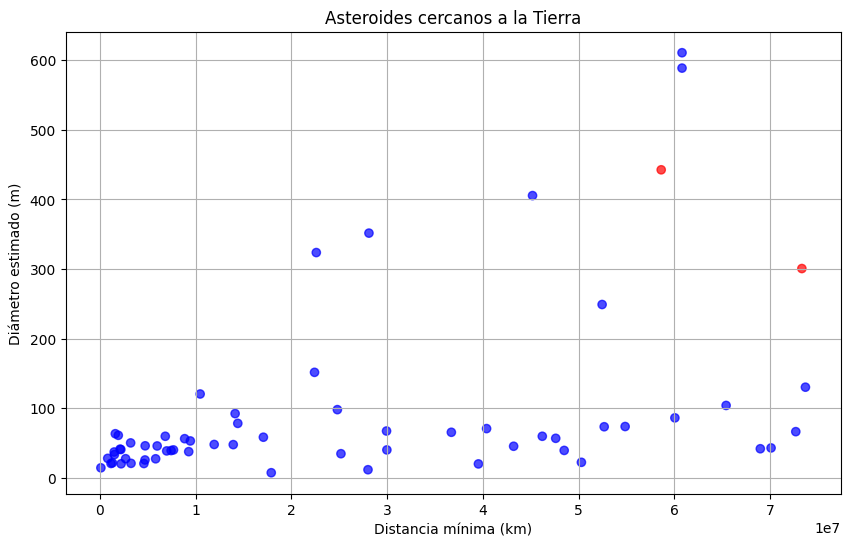

Proyecto 'NASA Data Explorer' ejecutado correctamente.
Has explorado: imagen astronómica diaria, fotos de Marte y datos de asteroides.


In [9]:
# ============================================
# NASA Data Explorer — Dashboard de datos reales
# ============================================
# Autor: Miguel Rollán
# Descripción: proyecto para explorar datos de la NASA.
# Incluye conexión con la API pública de la NASA, visualización de imágenes
# del "Astronomy Picture of the Day" (APOD) y del rover Curiosity en Marte.
# ============================================

import requests
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt

# ============================================
# CONFIGURACIÓN INICIAL
# ============================================

# Clave pública de la NASA
api_key = "vR7mdGDgxvEroqcTiRXW2PusFQm5K7AunWC3Qh6g"

# ============================================
# 1. Astronomy Picture of the Day (APOD)
# ============================================

print("=== Astronomy Picture of the Day (APOD) ===")
date = input("Introduce una fecha (YYYY-MM-DD) o deja en blanco para hoy: ")

url_apod = f"https://api.nasa.gov/planetary/apod?api_key={api_key}"
if date:
    url_apod += f"&date={date}"

try:
    response = requests.get(url_apod, timeout=10)
    response.raise_for_status()
    data = response.json()

    print(f"\nTítulo: {data.get('title', 'Sin título')}")
    print(f"Fecha: {data.get('date', 'Desconocida')}")
    print(f"Descripción: {data.get('explanation', 'Sin descripción disponible')[:500]}...")

    # Mostrar imagen
    if data.get("media_type") == "image":
        display(Image(url=data["url"]))
    else:
        print(f"Video disponible en: {data['url']}")

except requests.exceptions.Timeout:
    print("La solicitud ha tardado demasiado. Prueba otra vez.")
except requests.exceptions.RequestException as e:
    print(f"Error de conexión: {e}")
except ValueError:
    print("Error al procesar los datos del servidor.")

# ============================================
# 2. Rover de Marte (Curiosity)
# ============================================

print("\n=== Imágenes del Rover de Marte ===")
mars_date = input("Introduce una fecha (YYYY-MM-DD): ") or "2022-02-21"

url_mars = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?earth_date={mars_date}&api_key={api_key}"

print("Solicitando imágenes del rover de Marte...")

try:
    response_mars = requests.get(url_mars, timeout=10)
    response_mars.raise_for_status()
    data_mars = response_mars.json()

    photos = data_mars.get("photos", [])
    if len(photos) == 0:
        print("No se encontraron imágenes para esa fecha.")
    else:
        print(f" Se encontraron {len(photos)} imágenes. Mostrando solo 2:\n")
        for photo in photos[:2]:
            print(f"Rover: {photo['rover']['name']} | Cámara: {photo['camera']['full_name']}")
            display(Image(url=photo["img_src"]))
except requests.exceptions.Timeout:
    print("La solicitud ha tardado demasiado. Prueba con otra fecha.")
except requests.exceptions.RequestException as e:
    print(f" Error al acceder a la API de la NASA: {e}")
except ValueError:
    print(" Error al procesar los datos devueltos por la API.")

# ============================================
# 3. Datos de asteroides cercanos a la Tierra (NEO)
# ============================================

print("\n=== Datos de asteroides cercanos a la Tierra ===")

url_neo = f"https://api.nasa.gov/neo/rest/v1/feed?start_date=2024-10-01&end_date=2024-10-03&api_key={api_key}"

try:
    response_neo = requests.get(url_neo, timeout=10)
    response_neo.raise_for_status()
    data_neo = response_neo.json()

    near_earth_objects = data_neo.get("near_earth_objects", {})
    records = []

    for date, asteroids in near_earth_objects.items():
        for a in asteroids:
            records.append({
                "Fecha": date,
                "Nombre": a["name"],
                "Diámetro (m)": a["estimated_diameter"]["meters"]["estimated_diameter_max"],
                "Distancia mínima (km)": float(a["close_approach_data"][0]["miss_distance"]["kilometers"]),
                "Velocidad (km/h)": float(a["close_approach_data"][0]["relative_velocity"]["kilometers_per_hour"]),
                "Peligroso": a["is_potentially_hazardous_asteroid"]
            })

    df_asteroids = pd.DataFrame(records)
    print(f"Se obtuvieron {len(df_asteroids)} asteroides cercanos en el rango consultado.")
    display(df_asteroids.head())

    # ============================================
    # Visualización simple
    # ============================================
    plt.figure(figsize=(10, 6))
    plt.scatter(df_asteroids["Distancia mínima (km)"], df_asteroids["Diámetro (m)"],
                c=df_asteroids["Peligroso"].map({True: "red", False: "blue"}), alpha=0.7)
    plt.xlabel("Distancia mínima (km)")
    plt.ylabel("Diámetro estimado (m)")
    plt.title("Asteroides cercanos a la Tierra")
    plt.grid(True)
    plt.show()

except requests.exceptions.RequestException as e:
    print(f" Error al obtener datos de asteroides: {e}")
except ValueError:
    print(" Error al procesar datos de asteroides.")

# ============================================
# Fin del proyecto
# ============================================

print("Proyecto 'NASA Data Explorer' ejecutado correctamente.")
print("Has explorado: imagen astronómica diaria, fotos de Marte y datos de asteroides.")
